In [18]:
# Data Manipulation and Visualization 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly_express as px

#Hide API Key 
import creds

# setting theme style and seaborn Palette 
sns.set_theme(context = 'notebook', style='darkgrid', palette='muted')


from fredapi import Fred


# 1. Create a Fred Object

In [19]:
fred = Fred(api_key=creds.fred_key)

In [20]:
# Search for economic data on Fred

sp_search = fred.search('S&P', order_by='popularity')

In [21]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-11-14   2023-11-14   
CSUSHPINSA          CSUSHPINSA     2023-11-14   2023-11-14   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-11-14   2023-11-14   
SP500                    SP500     2023-11-14   2023-11-14   
MEHOINUSA672N    MEHOINUSA672N     2023-11-14   2023-11-14   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-11-13  Daily, Close   
CSUSHPINSA            1987-01-01      2023-08-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-11-13  Daily, Close   
SP500                 2013-11-14      2023-11-13  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-11-14 08:58:02-06:00   
CSUSHPINSA                           NSA  2023-10-31 08:12:01-05:00   
BAMLH0A0HYM2EY                       NSA  2023-11-14 08:58:06-06:00   
SP500                                NSA  2023-11-13 19:11:01-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

<Axes: title={'center': 'S&P 500'}>

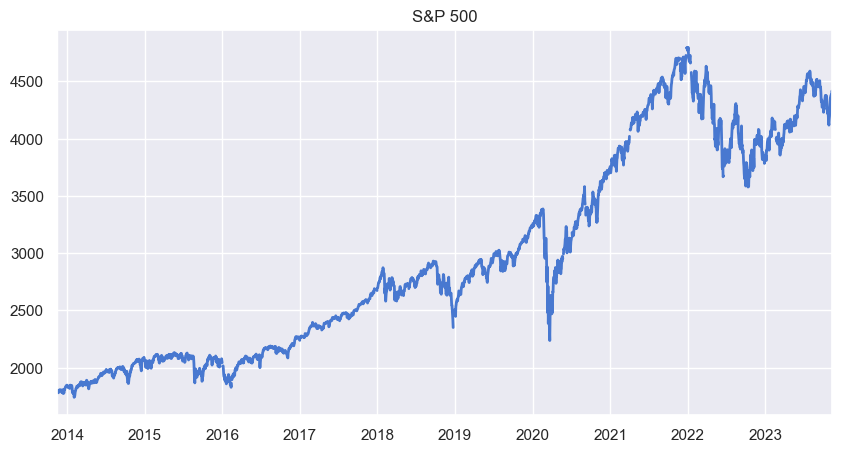

In [22]:
# Pull Raw Data 

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)


# Pull and Join Multiple Data Series 

In [23]:
# filtering a unemployment rate dataframe with a Monthly update frequency  
 
uemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))     # search for umemployment rate times series in Fred that has a monthly frequency
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')  # Query Seasonally Adjusted and Percent as units 
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]  # filter titles to those containing the phrase 'Unemployment Rate'
uemp_df = uemp_df.loc[uemp_df['id'].str.len() == 4]   # filter Series id to those with 4 words only (lenght of the string)

In [24]:
# dataframe with time series for all the US States 
uemp_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-11-14   2023-11-14  Unemployment Rate in California   
TXUR       TXUR     2023-11-14   2023-11-14       Unemployment Rate in Texas   
NYUR       NYUR     2023-11-14   2023-11-14    Unemployment Rate in New York   
FLUR       FLUR     2023-11-14   2023-11-14     Unemployment Rate in Florida   
OHUR       OHUR     2023-11-14   2023-11-14        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-09-01   Monthly               M   
TXUR             1976-01-01      2023-09-01   Monthly               M   
NYUR             1976-01-01      2023-09-01   Monthly               M   
FLUR             1976-01-01      2023-09-01   Monthly               M   
OHUR             1976-01-01      2023-09-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-10-24 08:53:02-05:00         60  None  
TXUR       2023-10-24 08:52:02-05:00         53  None  
NYUR       2023-10-24 08:53:03-05:00         51  None  
FLUR       2023-10-24 08:53:04-05:00         47  None  
OHUR       2023-10-24 08:52:03-05:00         39  None

In [25]:
# create DF with all the Participation rate's time series

all_results = []


for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [26]:
uemp_states = pd.concat(all_results, axis=1)
uemp_states = uemp_states.drop('PRUR', axis=1) # remove Puerto Rico 
uemp_states

CAUR  TXUR  NYUR  FLUR  OHUR  ALUR  MIUR  COUR  MAUR  MNUR  ...  \
1976-01-01   9.2   5.8  10.3   9.7   8.1   6.6   9.9   5.8  10.5   6.0  ...   
1976-02-01   9.2   5.8  10.3   9.7   8.1   6.6   9.9   5.7  10.5   6.0  ...   
1976-03-01   9.1   5.9  10.2   9.6   8.1   6.6   9.9   5.7  10.5   5.9  ...   
1976-04-01   9.1   5.9  10.2   9.5   8.0   6.5   9.8   5.6  10.3   5.8  ...   
1976-05-01   9.0   5.9  10.1   9.3   7.8   6.4   9.6   5.6  10.1   5.7  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2023-05-01   4.5   4.1   3.9   2.6   3.6   2.2   3.7   2.8   2.8   2.9  ...   
2023-06-01   4.6   4.1   3.9   2.6   3.4   2.2   3.6   2.8   2.6   2.9  ...   
2023-07-01   4.6   4.1   3.9   2.7   3.3   2.1   3.6   2.9   2.5   3.0  ...   
2023-08-01   4.6   4.1   3.9   2.7   3.4   2.1   3.7   3.1   2.6   3.1  ...   
2023-09-01   4.7   4.1   4.0   2.8   3.4   2.2   3.9   3.2   2.6   3.1  ...   

            OKUR  DCUR  NEUR  CTUR  IDUR  RIUR  DEUR  NHUR  MEUR  VTUR  
1976-01-01   5.8   8.7   3.3   9.8   5.6   7.8   8.0   6.5   8.7   8.6  
1976-02-01   5.8   8.7   3.3   9.8   5.6   7.8   8.0   6.5   8.7   8.6  
1976-03-01   5.8   8.6   3.3   9.8   5.6   7.7   8.0   6.5   8.6   8.6  
1976-04-01   5.8   8.5   3.2   9.6   5.6   7.7   8.1   6.5   8.6   8.6  
1976-05-01   5.7   8.4   3.1   9.4   5.6   7.7   8.3   6.5   8.5   8.5  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2023-05-01   2.8   5.1   1.9   3.7   2.6   3.0   4.2   1.9   2.4   2.1  
2023-06-01   2.7   5.1   1.9   3.7   2.7   2.9   4.2   1.8   2.4   1.9  
2023-07-01   2.7   5.0   2.0   3.6   2.8   2.8   4.1   1.7   2.4   1.8  
2023-08-01   2.8   5.0   2.0   3.5   3.0   2.7   4.1   1.8   2.5   1.8  
2023-09-01   3.0   5.0   2.1   3.5   3.1   2.6   4.1   2.0   2.7   1.9  

[573 rows x 51 columns]

In [27]:
#Plot state unemployment rate 

px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State (Covid-19 impact)

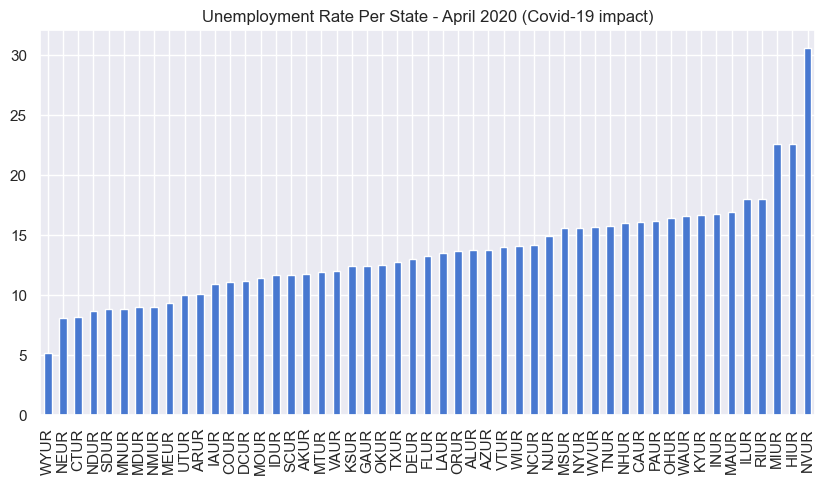

In [28]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='bar', figsize=(10,5), title='Unemployment Rate Per State - April 2020 (Covid-19 impact)')
ax.legend().remove()
plt.show()

In [29]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()  #Create a dictionary of all state names linked to it's Fred's ID.
id_to_state


{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'MIUR': 'Michigan',
 'COUR': 'Colorado',
 'MAUR': 'Massachusetts',
 'MNUR': 'Minnesota',
 'VAUR': 'Virginia',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'PAUR': 'Pennsylvania',
 'KYUR': 'Kentucky',
 'WAUR': 'Washington',
 'GAUR': 'Georgia',
 'NJUR': 'New Jersey',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'ORUR': 'Oregon',
 'MDUR': 'Maryland',
 'TNUR': 'Tennessee',
 'WVUR': 'West Virginia',
 'IAUR': 'Iowa',
 'AKUR': 'Alaska',
 'SCUR': 'South Carolina',
 'LAUR': 'Louisiana',
 'INUR': 'Indiana',
 'NVUR': 'Nevada',
 'NMUR': 'New Mexico',
 'NDUR': 'North Dakota',
 'ARUR': 'Arkansas',
 'HIUR': 'Hawaii',
 'UTUR': 'Utah',
 'MOUR': 'Missouri',
 'MTUR': 'Montana',
 'MSUR': 'Mississippi',
 'KSUR': 'Kansas',
 'SDUR': 'South Dakota',
 'WYUR': 'Wyoming',
 'OKUR': 'Oklahoma',
 'DCUR': 'the District of Columbia',
 'NEUR': 'Nebraska',
 'CTUR': 'Connecticut',
 'IDUR': 'Idaho',
 

In [30]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]  # convert df's columns into the state name  
uemp_states

California  Texas  New York  Florida  Ohio  Alabama  Michigan  \
1976-01-01         9.2    5.8      10.3      9.7   8.1      6.6       9.9   
1976-02-01         9.2    5.8      10.3      9.7   8.1      6.6       9.9   
1976-03-01         9.1    5.9      10.2      9.6   8.1      6.6       9.9   
1976-04-01         9.1    5.9      10.2      9.5   8.0      6.5       9.8   
1976-05-01         9.0    5.9      10.1      9.3   7.8      6.4       9.6   
...                ...    ...       ...      ...   ...      ...       ...   
2023-05-01         4.5    4.1       3.9      2.6   3.6      2.2       3.7   
2023-06-01         4.6    4.1       3.9      2.6   3.4      2.2       3.6   
2023-07-01         4.6    4.1       3.9      2.7   3.3      2.1       3.6   
2023-08-01         4.6    4.1       3.9      2.7   3.4      2.1       3.7   
2023-09-01         4.7    4.1       4.0      2.8   3.4      2.2       3.9   

            Colorado  Massachusetts  Minnesota  ...  Oklahoma  \
1976-01-01       5.8           10.5        6.0  ...       5.8   
1976-02-01       5.7           10.5        6.0  ...       5.8   
1976-03-01       5.7           10.5        5.9  ...       5.8   
1976-04-01       5.6           10.3        5.8  ...       5.8   
1976-05-01       5.6           10.1        5.7  ...       5.7   
...              ...            ...        ...  ...       ...   
2023-05-01       2.8            2.8        2.9  ...       2.8   
2023-06-01       2.8            2.6        2.9  ...       2.7   
2023-07-01       2.9            2.5        3.0  ...       2.7   
2023-08-01       3.1            2.6        3.1  ...       2.8   
2023-09-01       3.2            2.6        3.1  ...       3.0   

            the District of Columbia  Nebraska  Connecticut  Idaho  \
1976-01-01                       8.7       3.3          9.8    5.6   
1976-02-01                       8.7       3.3          9.8    5.6   
1976-03-01                       8.6       3.3          9.8    5.6   
1976-04-01                       8.5       3.2          9.6    5.6   
1976-05-01                       8.4       3.1          9.4    5.6   
...                              ...       ...          ...    ...   
2023-05-01                       5.1       1.9          3.7    2.6   
2023-06-01                       5.1       1.9          3.7    2.7   
2023-07-01                       5.0       2.0          3.6    2.8   
2023-08-01                       5.0       2.0          3.5    3.0   
2023-09-01                       5.0       2.1          3.5    3.1   

            Rhode Island  Delaware  New Hampshire  Maine  Vermont  
1976-01-01           7.8       8.0            6.5    8.7      8.6  
1976-02-01           7.8       8.0            6.5    8.7      8.6  
1976-03-01           7.7       8.0            6.5    8.6      8.6  
1976-04-01           7.7       8.1            6.5    8.6      8.6  
1976-05-01           7.7       8.3            6.5    8.5      8.5  
...                  ...       ...            ...    ...      ...  
2023-05-01           3.0       4.2            1.9    2.4      2.1  
2023-06-01           2.9       4.2            1.8    2.4      1.9  
2023-07-01           2.8       4.1            1.7    2.4      1.8  
2023-08-01           2.7       4.1            1.8    2.5      1.8  
2023-09-01           2.6       4.1            2.0    2.7      1.9  

[573 rows x 51 columns]

In [31]:
px.line(uemp_states)   # Line Chart Unemployment rate per Stat in the las 40 years 

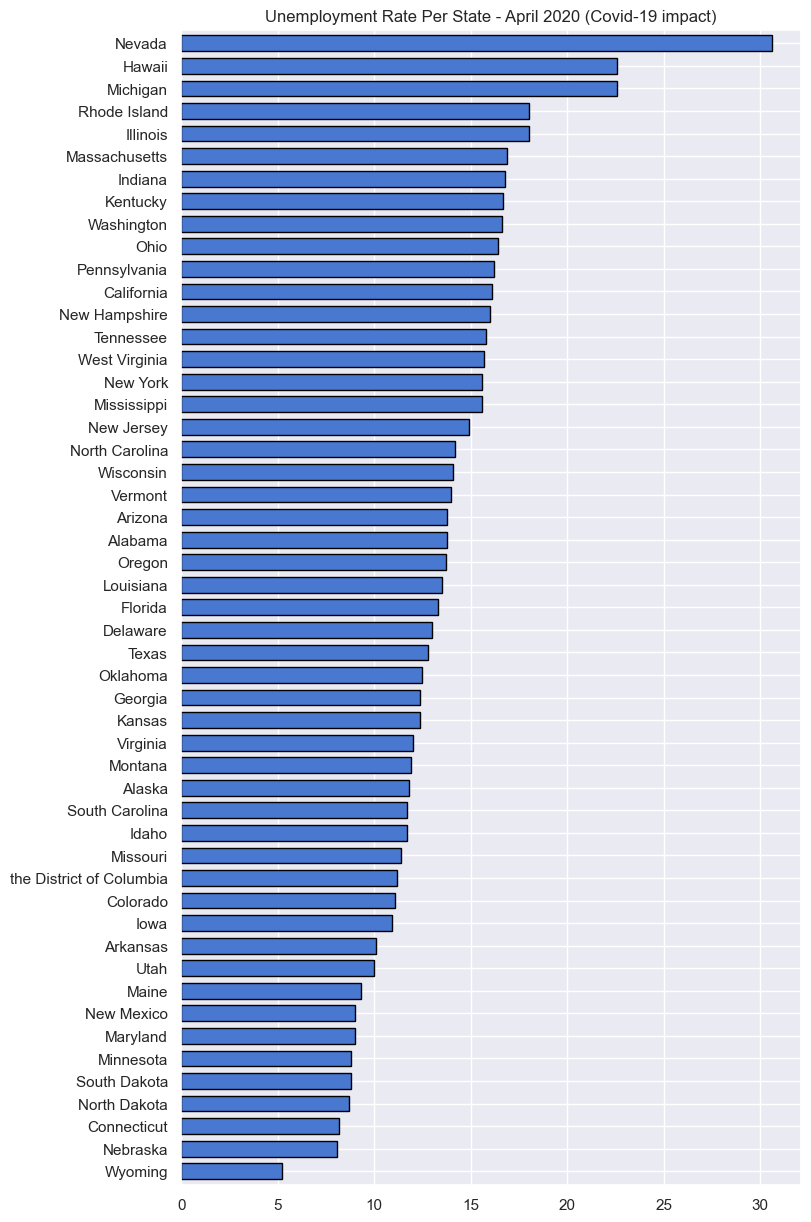

In [32]:
# horizontal bar graph showing Unemployment Rate Per State in April 2020

ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8,15), width=0.7, edgecolor = 'black',
          title='Unemployment Rate Per State - April 2020 (Covid-19 impact)')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [34]:
# filtering a Participation Rate dataframe with a Monthly update frequency  
 
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))     # search for umemployment rate times series in Fred that has a monthly frequency
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')  # Query Seasonally Adjusted and Percent as units 
part_df = part_df.loc[part_df['title'].str.contains('Participation Rate')]  # filter titles to those containing the phrase 'Unemployment Rate'
part_df = part_df.loc[part_df['id'].str.len() == 7]   # filter Series id to those with 4 words only (lenght of the string)
part_df = part_df.drop(index='CIVPART')  # drop one series ID 
part_df.head()

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2023-11-14   2023-11-14   
LBSSA21    LBSSA21     2023-11-14   2023-11-14   
LBSSA01    LBSSA01     2023-11-14   2023-11-14   
LBSSA36    LBSSA36     2023-11-14   2023-11-14   
LBSSA12    LBSSA12     2023-11-14   2023-11-14   

                                                   title observation_start  \
series id                                                                    
LBSSA06    Labor Force Participation Rate for California        1976-01-01   
LBSSA21      Labor Force Participation Rate for Kentucky        1976-01-01   
LBSSA01       Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA36      Labor Force Participation Rate for New York        1976-01-01   
LBSSA12       Labor Force Participation Rate for Florida        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA06        2023-09-01   Monthly               M  Percent           %   
LBSSA21        2023-09-01   Monthly               M  Percent           %   
LBSSA01        2023-09-01   Monthly               M  Percent           %   
LBSSA36        2023-09-01   Monthly               M  Percent           %   
LBSSA12        2023-09-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA06    Seasonally Adjusted                        SA   
LBSSA21    Seasonally Adjusted                        SA   
LBSSA01    Seasonally Adjusted                        SA   
LBSSA36    Seasonally Adjusted                        SA   
LBSSA12    Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
LBSSA06    2023-10-20 09:01:05-05:00         17   
LBSSA21    2023-10-20 09:01:01-05:00         27   
LBSSA01    2023-10-20 09:01:09-05:00         10   
LBSSA36    2023-10-20 09:01:06-05:00         23   
LBSSA12    2023-10-20 09:01:03-05:00         22   

                                                       notes  
series id                                                     
LBSSA06    A state's labor-force participation rate is th...  
LBSSA21    A state's labor-force participation rate is th...  
LBSSA01    A state's labor-force participation rate is th...  
LBSSA36    A state's labor-force participation rate is th...  
LBSSA12    A state's labor-force participation rate is th...

In [35]:
id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()  #Create a dictionary of all state names linked to it's Fred's ID.


all_results = []

# create DF with all the Participation rate's time series

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)        
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)
part_states.columns = [id_to_state[c] for c in part_states.columns]

In [36]:
part_states

California  Kentucky  Alabama  New York  Florida  Wisconsin  \
1976-01-01        62.6      60.5     57.0      58.0     55.8       65.6   
1976-02-01        62.4      60.3     56.9      58.0     55.7       65.5   
1976-03-01        62.2      60.2     56.8      58.0     55.5       65.4   
1976-04-01        62.2      60.1     56.8      58.0     55.5       65.4   
1976-05-01        62.3      60.1     56.8      58.1     55.4       65.5   
...                ...       ...      ...       ...      ...        ...   
2023-05-01        62.5      57.7     56.9      61.0     59.4       65.1   
2023-06-01        62.5      57.8     57.0      61.2     59.5       65.3   
2023-07-01        62.4      57.7     57.0      61.4     59.7       65.5   
2023-08-01        62.4      57.6     57.0      61.5     59.7       65.7   
2023-09-01        62.3      57.4     57.0      61.6     59.8       65.8   

            Michigan  Minnesota  Texas  Ohio  ...  Alaska  Vermont  \
1976-01-01      61.6       65.6   63.8  61.7  ...    69.0     63.6   
1976-02-01      61.5       65.5   63.5  61.7  ...    68.4     63.4   
1976-03-01      61.5       65.4   63.4  61.7  ...    67.8     63.2   
1976-04-01      61.6       65.4   63.5  61.6  ...    67.9     63.5   
1976-05-01      61.7       65.5   63.6  61.6  ...    67.9     63.6   
...              ...        ...    ...   ...  ...     ...      ...   
2023-05-01      60.5       68.2   64.2  62.1  ...    65.3     63.7   
2023-06-01      60.7       68.4   64.2  62.2  ...    65.3     63.8   
2023-07-01      61.0       68.5   64.2  62.1  ...    65.2     63.9   
2023-08-01      61.3       68.5   64.2  62.1  ...    65.2     64.0   
2023-09-01      61.6       68.5   64.2  62.1  ...    65.2     64.1   

            New Hampshire  Delaware  Hawaii  Arkansas  North Dakota  Wyoming  \
1976-01-01           65.9      62.7    69.9      57.9          62.6     65.3   
1976-02-01           65.6      62.5    69.6      57.8          62.4     64.9   
1976-03-01           65.6      62.5    69.6      57.7          62.3     64.7   
1976-04-01           65.7      62.4    69.4      57.7          62.5     64.9   
1976-05-01           66.0      62.4    69.3      57.7          62.6     65.2   
...                   ...       ...     ...       ...           ...      ...   
2023-05-01           65.3      59.9    60.4      57.5          69.7     64.6   
2023-06-01           65.2      60.0    60.4      57.6          69.7     64.6   
2023-07-01           64.9      60.1    60.3      57.7          69.7     64.6   
2023-08-01           64.6      60.3    60.2      57.7          69.5     64.5   
2023-09-01           64.6      60.5    60.1      57.8          69.3     64.4   

            Rhode Island  District Of Columbia  
1976-01-01          63.8                  64.4  
1976-02-01          63.7                  64.5  
1976-03-01          63.6                  64.5  
1976-04-01          63.7                  64.5  
1976-05-01          63.6                  64.4  
...                  ...                   ...  
2023-05-01          63.1                  70.8  
2023-06-01          63.2                  70.8  
2023-07-01          63.3                  70.8  
2023-08-01          63.3                  70.9  
2023-09-01          63.4                  71.1  

[573 rows x 51 columns]

# Plot Unemployment vs Participation 

In [37]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District of Columbia'}) # fix DC

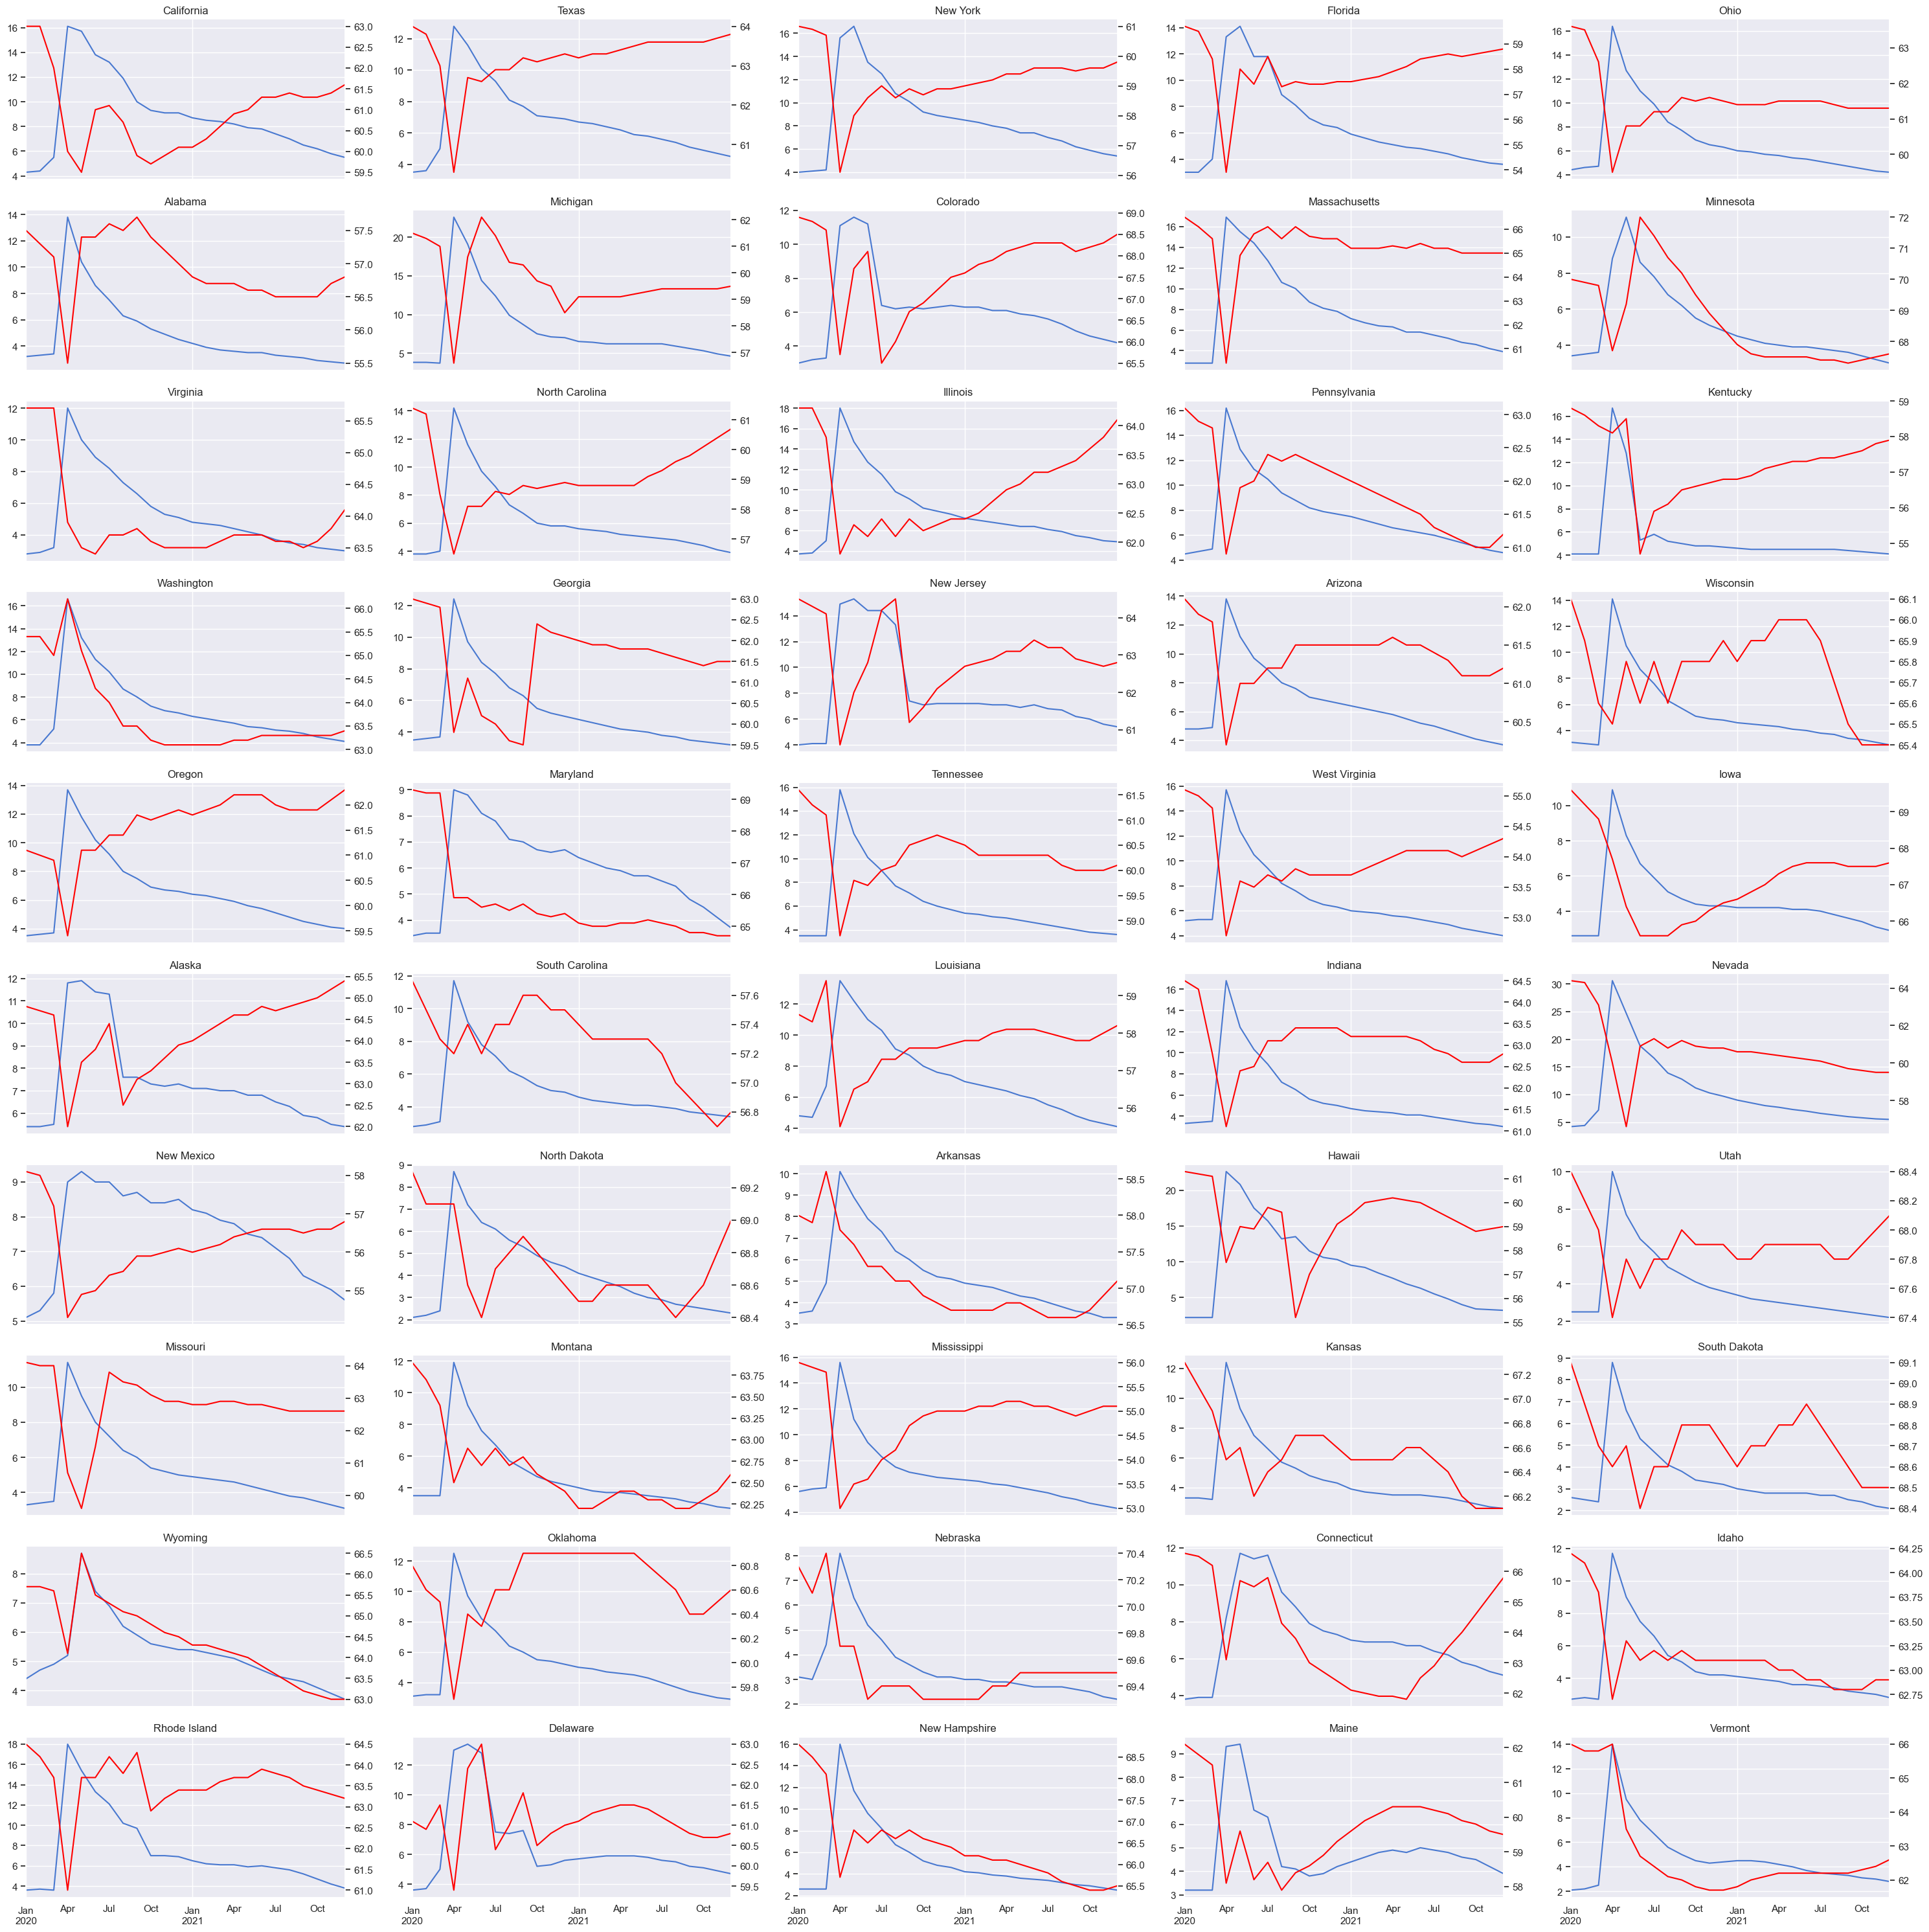

In [38]:
# Plot both Unemployment and participation rates per state in the same plot 

fig, axs = plt.subplots(10, 5, figsize = (30,30), sharex=True)
axs = axs.flatten()

i = 0 

for state in uemp_states.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()

    uemp_states.query('index >=2020 and index < 2022')[state] \
        .plot(ax=axs[i])
    part_states.query('index >=2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color='red')
    ax2.grid(False)
    axs[i].set_title(state, fontsize=12)
    i += 1

plt.tight_layout()
plt.show()